# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# Business Objective
1. Identify which of the following features to be used to predict the price of a car.
* id
* region
* year
* manufacturer
* model
* condition
* cylinders
* fuel
* odometer
* title_status
* transmission
* VIN
* drive
* size
* type
* paint_color
* state

2. Assess if the selected features can be used to predict the price of a car with reasonable accuracy.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Import Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
#from sklearn.inspection import permutation_importance

Import Data

In [62]:
data = pd.read_csv('data/vehicles.csv')

Perform Exploratory Data Analysis (EDA)

In [63]:
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Assess Numeric Columns

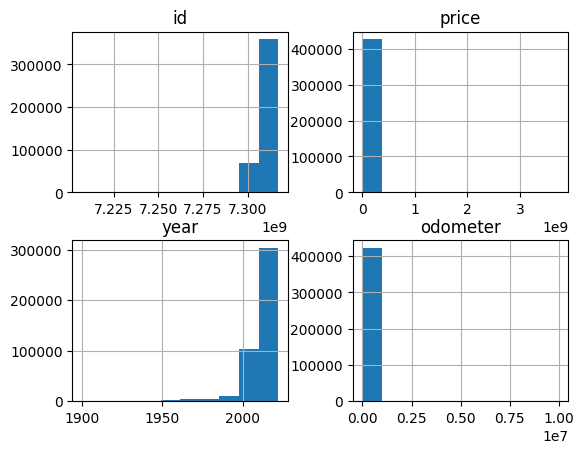

In [65]:
data.hist()
plt.savefig("images/raw_data_histograms.png")

Assessment:
- Numeric columns are skewed due to outliers.
- Identify reasonable values to remove outliers.


Numeric Data Assumptions:
- Price range of car lies within 1k and 300k.
- Only cars from year 1990 have resale value.
- Only cars with less than 500k clocked on the odometer have resale value.

In [66]:
# filter out numeric outliers based on assumptions made
filtered_data = data[(data['price'] <= 300000) & (data['price'] >= 1000) & (data['year'] >= 1990) & (data['odometer'] <= 500000)]

In [67]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364814 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            364814 non-null  int64  
 1   region        364814 non-null  object 
 2   price         364814 non-null  int64  
 3   year          364814 non-null  float64
 4   manufacturer  353288 non-null  object 
 5   model         361434 non-null  object 
 6   condition     226807 non-null  object 
 7   cylinders     214812 non-null  object 
 8   fuel          362704 non-null  object 
 9   odometer      364814 non-null  float64
 10  title_status  358772 non-null  object 
 11  transmission  363308 non-null  object 
 12  VIN           230444 non-null  object 
 13  drive         255086 non-null  object 
 14  size          101683 non-null  object 
 15  type          289437 non-null  object 
 16  paint_color   261573 non-null  object 
 17  state         364814 non-null  object 
dtypes: float

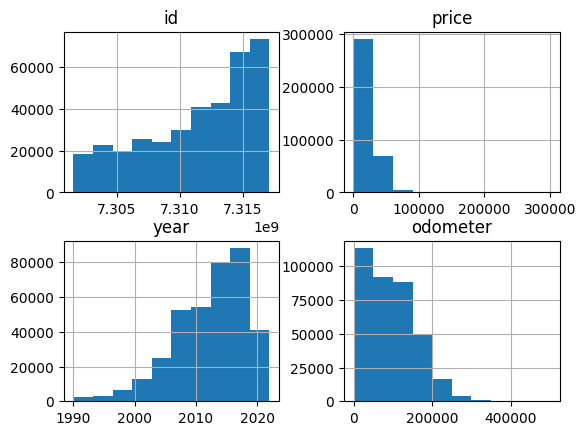

In [68]:
# plot numeric columns
filtered_data.hist()
plt.savefig("images/filtered_data_histograms.png")

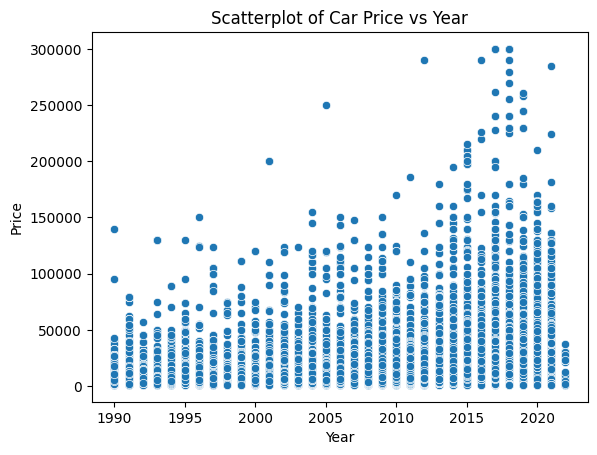

In [69]:
sns.scatterplot(data = filtered_data, x='year', y='price')
plt.title('Scatterplot of Car Price vs Year')
plt.ylabel('Price')
plt.xlabel('Year')
plt.savefig("images/scatter_price_year.png")

Assessment:
- Positive correlation between car price and year. This correctly indicates that newer cars are more expensive.

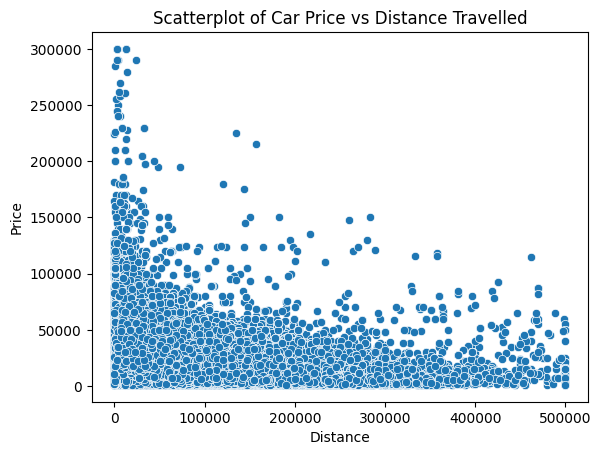

In [70]:
sns.scatterplot(data = filtered_data, x='odometer', y='price')
plt.title('Scatterplot of Car Price vs Distance Travelled')
plt.ylabel('Price')
plt.xlabel('Distance')
plt.savefig("images/scatter_price_distance.png")


Assessment:
- Negative correlation between car price and distance travelled. This correctly captures that cars that have been used more are cheaper.

Assess Categorical Columns

In [71]:
cat_data = data.select_dtypes(include=['object'])
cat_data.nunique()

,0
region,404
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
title_status,6
transmission,3
VIN,118246
drive,3


Categorical Data Assumptions (all columns):

Columns dropped upfront:
- Drop 'VIN', 'model' - too many distinct values to be useful in predictions.

Columns dropped after EDA:
- Drop 'state', 'region' - assume that car prices don't vary significantly across states and regions.
- Drop 'size' - significant number of NULL values.
- Drop 'title_status' - data is dominated by a single value 'clean'.
- Drop 'manufacturer', 'type', 'paint_colour' - these have a fair number of distinct values and are parked for future assessment.

Selected Features:
- Select key features as: 'fuel', 'condition', 'transmission', 'drive', 'cylinders' - these are the key features potential car buyers will look our for when they purchase a car.

In [72]:
cat_data.drop(['region', 'model', 'VIN', 'state'], axis=1, inplace=True)

In [73]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   manufacturer  409234 non-null  object
 1   condition     252776 non-null  object
 2   cylinders     249202 non-null  object
 3   fuel          423867 non-null  object
 4   title_status  418638 non-null  object
 5   transmission  424324 non-null  object
 6   drive         296313 non-null  object
 7   size          120519 non-null  object
 8   type          334022 non-null  object
 9   paint_color   296677 non-null  object
dtypes: object(10)
memory usage: 32.6+ MB


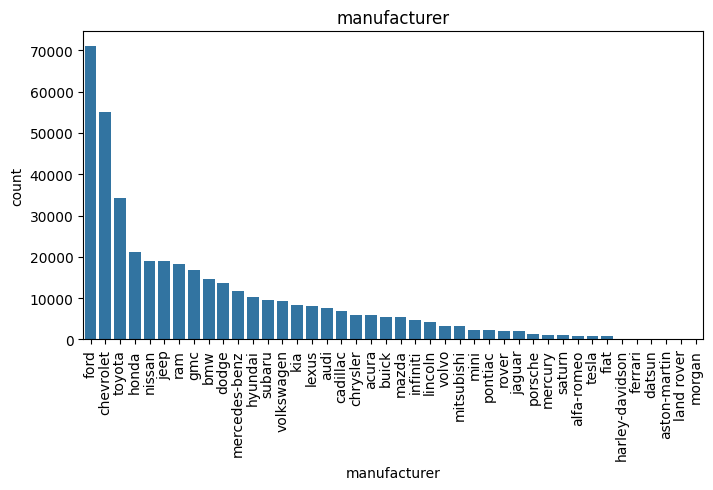

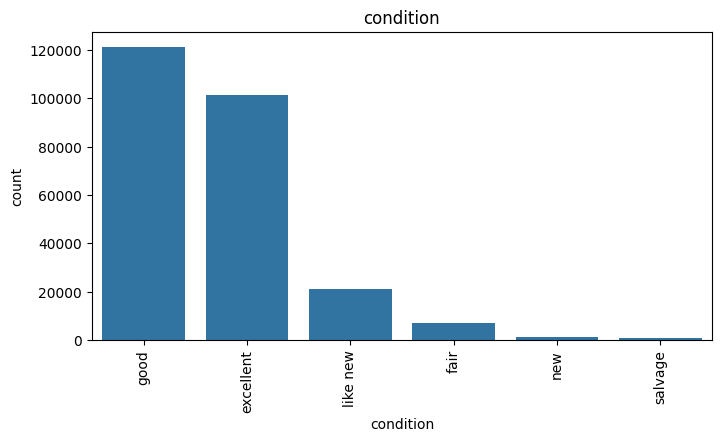

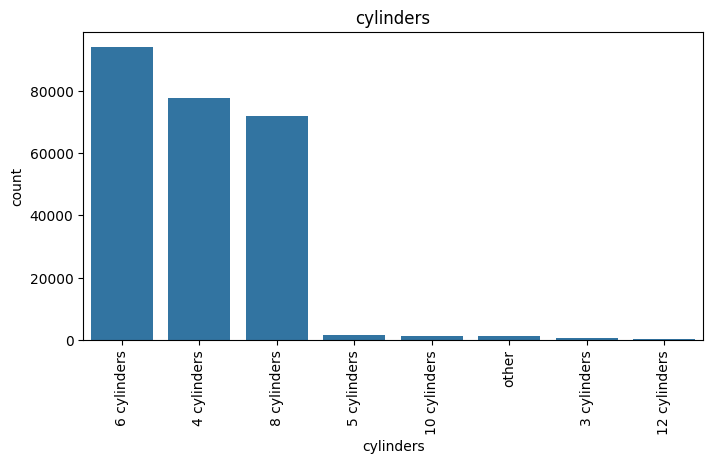

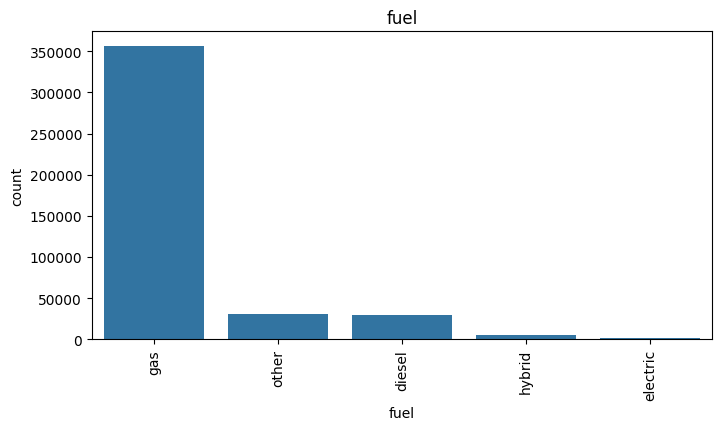

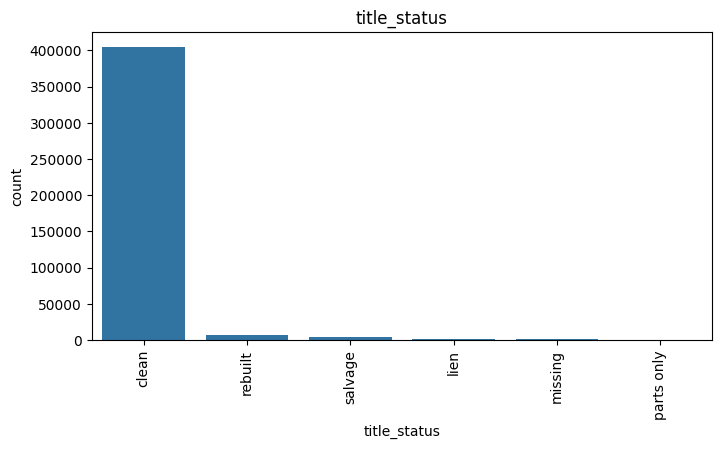

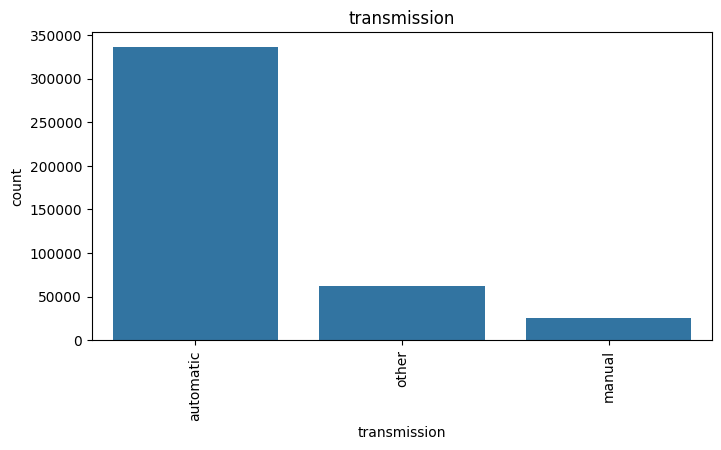

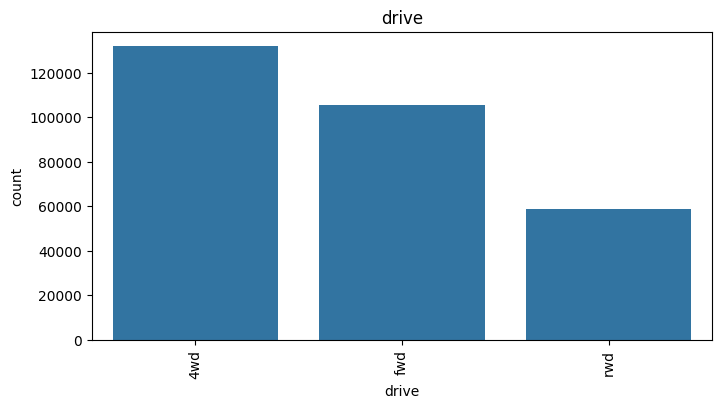

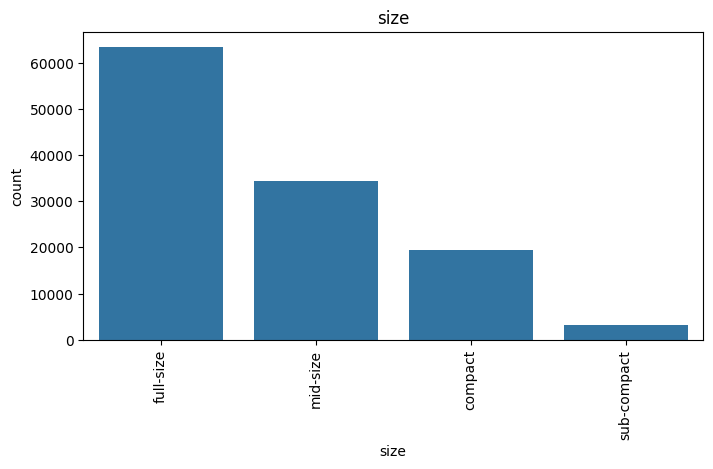

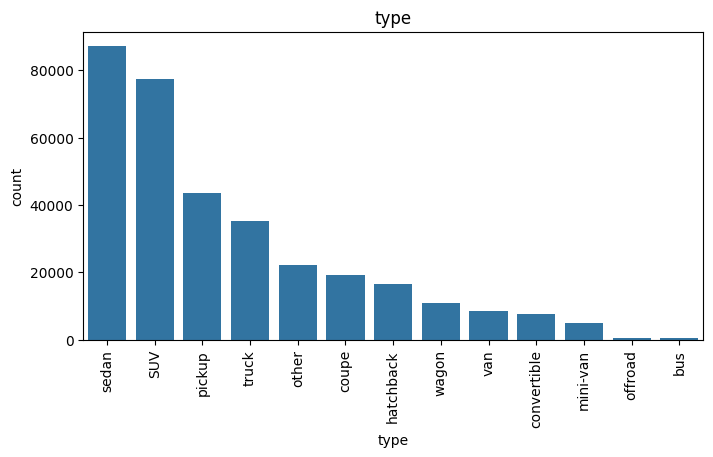

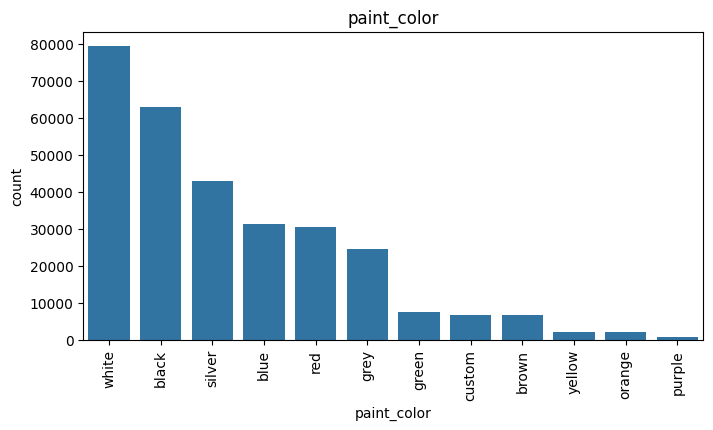

In [74]:
for col in cat_data.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x = col, data = cat_data, order = cat_data[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.savefig("images/count_" + col + ".png")
    plt.show()

# Data Preparation

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Selected Features

In [75]:
num_features = ['year', 'odometer']
cat_features = ['fuel', 'condition', 'transmission', 'drive', 'cylinders']
data = data[num_features + cat_features + ['price']]

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          425675 non-null  float64
 1   odometer      422480 non-null  float64
 2   fuel          423867 non-null  object 
 3   condition     252776 non-null  object 
 4   transmission  424324 non-null  object 
 5   drive         296313 non-null  object 
 6   cylinders     249202 non-null  object 
 7   price         426880 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 26.1+ MB


In [77]:
data.describe()

,year,odometer,price
count,425675.000000,4.224800e+05,4.268800e+05
mean,2011.235191,9.804333e+04,7.519903e+04
std,9.452120,2.138815e+05,1.218228e+07
min,1900.000000,0.000000e+00,0.000000e+00
25%,2008.000000,3.770400e+04,5.900000e+03
50%,2013.000000,8.554800e+04,1.395000e+04
75%,2017.000000,1.335425e+05,2.648575e+04
max,2022.000000,1.000000e+07,3.736929e+09


Clean Data

In [78]:
data['fuel'].value_counts(dropna=False)

,count
fuel,
gas,356209
other,30728
diesel,30062
hybrid,5170
NaN,3013
electric,1698


In [79]:
data['condition'].value_counts(dropna=False)

,count
condition,
NaN,174104
good,121456
excellent,101467
like new,21178
fair,6769
new,1305
salvage,601


In [80]:
data['transmission'].value_counts(dropna=False)

,count
transmission,
automatic,336524
other,62682
manual,25118
NaN,2556


In [81]:
data['drive'].value_counts(dropna=False)

,count
drive,
4wd,131904
NaN,130567
fwd,105517
rwd,58892


In [82]:
data['cylinders'].value_counts(dropna=False)

,count
cylinders,
NaN,177678
6 cylinders,94169
4 cylinders,77642
8 cylinders,72062
5 cylinders,1712
10 cylinders,1455
other,1298
3 cylinders,655
12 cylinders,209


Categorical Data Assumptions (selected data):

Selected Features:
- 'fuel' - fill NULL with mode value i.e 'gas', which is reasonable as this is the case for majority of the cars
- 'condition' - fill NULL with mode value i.e 'good', which is reasonable for a resale car
- 'transmission' - fill NULL with mode value i.e 'automatic', which is reasonable as this is the case for majority of the cars
- 'drive' - fill NULL with specific value 'fwd', which is reasonable as majority of the cars use front-wheel drive
- 'cylinders' - fill NULL with specific value '4 cylinders', which is reasonable as majority of the cars run on 4 cylinders. Further, consolidate 3/5/10/12 cylinder counts to 'other' as these have relatively low counts.

In [83]:
# fill NULL values for categorical features
data['fuel'] = data['fuel'].fillna(data['fuel'].mode()[0]) # reasonable to assume 'gas'
data['condition'] = data['condition'].fillna(data['condition'].mode()[0]) # reasonable to assume 'good'
data['transmission'] = data['transmission'].fillna(data['transmission'].mode()[0]) # reasonable to assume 'automatic'
data['drive'] = data['drive'].fillna('fwd') # reasonable to assume 'fwd'
data['cylinders'] = data['cylinders'].fillna('4 cylinders') # reasonable to assume '4 cylinders' for a typical car

# consolidate values for categorical features
data['cylinders'] = data['cylinders'].replace({'3 cylinders':'other', '5 cylinders':'other', '10 cylinders':'other', '12 cylinders':'other'})

In [84]:
data['fuel'].value_counts(dropna=False)

,count
fuel,
gas,359222
other,30728
diesel,30062
hybrid,5170
electric,1698


In [85]:
data['condition'].value_counts(dropna=False)

,count
condition,
good,295560
excellent,101467
like new,21178
fair,6769
new,1305
salvage,601


In [86]:
data['transmission'].value_counts(dropna=False)

,count
transmission,
automatic,339080
other,62682
manual,25118


In [87]:
data['drive'].value_counts(dropna=False)

,count
drive,
fwd,236084
4wd,131904
rwd,58892


In [88]:
data['cylinders'].value_counts(dropna=False)

,count
cylinders,
4 cylinders,255320
6 cylinders,94169
8 cylinders,72062
other,5329


In [89]:
# remove outliers as per numeric data assumptions
data = data[(data['price'] <= 300000) & (data['price'] >= 1000) & (data['year'] >= 1990) & (data['odometer'] <= 500000)]

Transform Data

In [90]:
# change 'year' to 'age', assuming we are currently in year 2025
data['age'] = 2025 - data['year']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364814 entries, 27 to 426879
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          364814 non-null  float64
 1   odometer      364814 non-null  float64
 2   fuel          364814 non-null  object 
 3   condition     364814 non-null  object 
 4   transmission  364814 non-null  object 
 5   drive         364814 non-null  object 
 6   cylinders     364814 non-null  object 
 7   price         364814 non-null  int64  
 8   age           364814 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.8+ MB


In [91]:
data.describe()

,year,odometer,price,age
count,364814.000000,364814.000000,364814.000000,364814.000000
mean,2012.283991,93727.004822,19586.993956,12.716009
std,5.808249,64085.442520,15022.597239,5.808249
min,1990.000000,0.000000,1000.000000,3.000000
25%,2009.000000,38975.250000,7995.000000,8.000000
50%,2013.000000,88700.000000,15995.000000,12.000000
75%,2017.000000,136863.500000,27995.000000,16.000000
max,2022.000000,500000.000000,299991.000000,35.000000


In [92]:
# update features
num_features = ['age', 'odometer']
cat_features = ['fuel', 'condition', 'transmission', 'drive', 'cylinders']
data = data[num_features + cat_features + ['price']]

Plot Cleaned Data

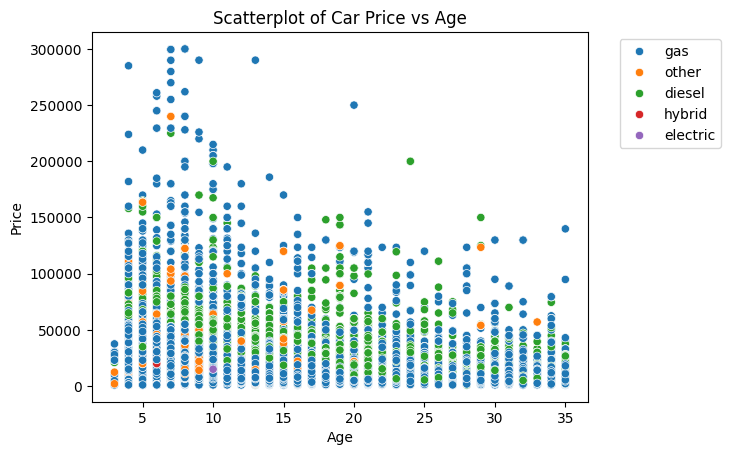

In [93]:
sns.scatterplot(data = data, x = 'age', y = 'price', hue = 'fuel')
plt.title('Scatterplot of Car Price vs Age')
plt.ylabel('Price')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/scatter_age_price_fuel.png")


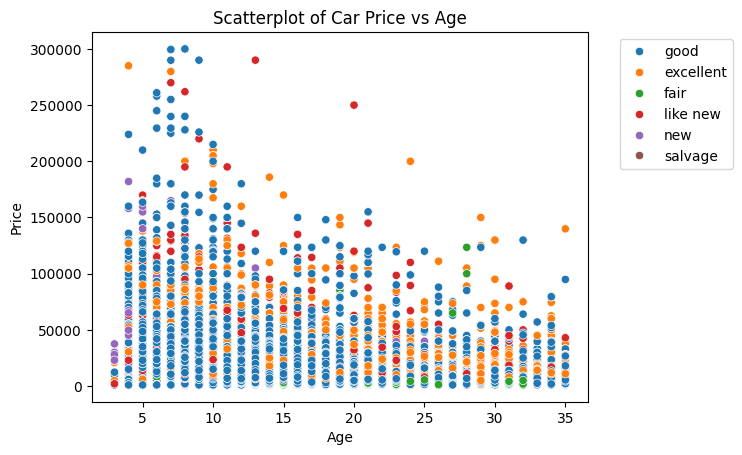

In [94]:
sns.scatterplot(data = data, x = 'age', y = 'price', hue = 'condition')
plt.title('Scatterplot of Car Price vs Age')
plt.ylabel('Price')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/scatter_age_price_condition.png")

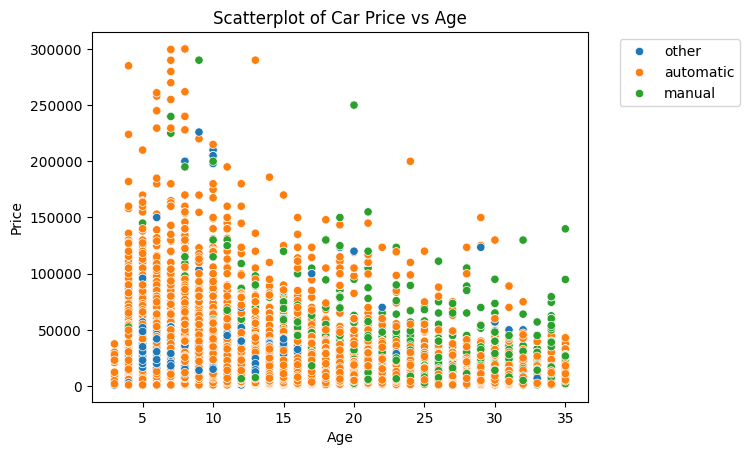

In [95]:
sns.scatterplot(data = data, x = 'age', y = 'price', hue = 'transmission')
plt.title('Scatterplot of Car Price vs Age')
plt.ylabel('Price')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/scatter_age_price_transmission.png")

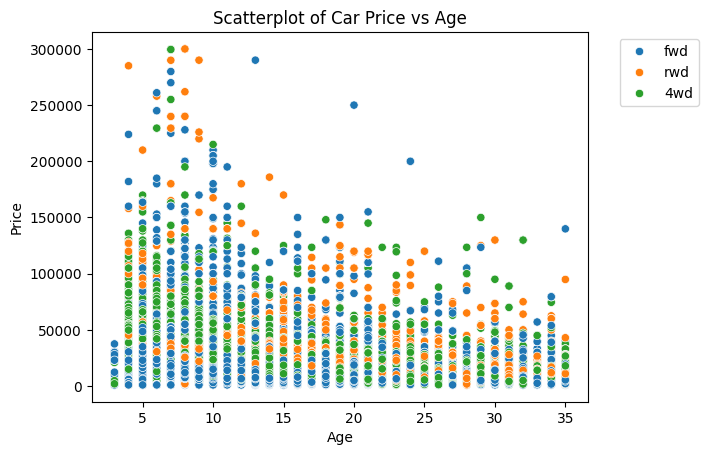

In [96]:
sns.scatterplot(data = data, x = 'age', y = 'price', hue = 'drive')
plt.title('Scatterplot of Car Price vs Age')
plt.ylabel('Price')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/scatter_age_price_drive.png")

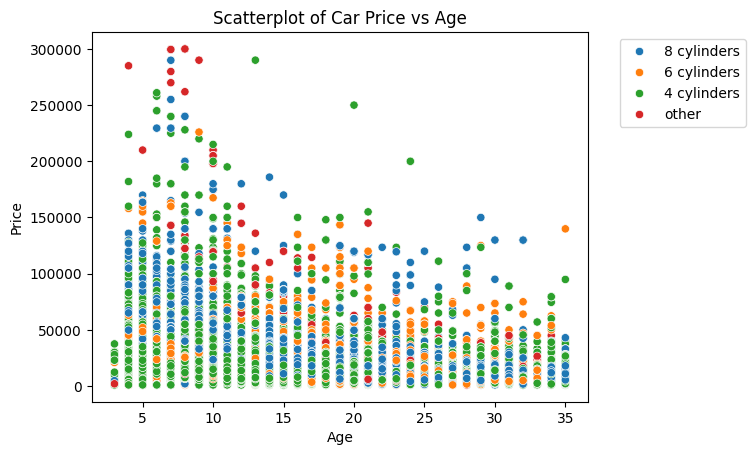

In [97]:
sns.scatterplot(data = data, x = 'age', y = 'price', hue = 'cylinders')
plt.title('Scatterplot of Car Price vs Age')
plt.ylabel('Price')
plt.xlabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("images/scatter_age_price_cylinders.png")

In [98]:
# shuffle data
data = shuffle(data, random_state = 42)

In [99]:
# reset index to start at 0
data = data.reset_index(drop=True)

In [100]:
data.describe()

,age,odometer,price
count,364814.000000,364814.000000,364814.000000
mean,12.716009,93727.004822,19586.993956
std,5.808249,64085.442520,15022.597239
min,3.000000,0.000000,1000.000000
25%,8.000000,38975.250000,7995.000000
50%,12.000000,88700.000000,15995.000000
75%,16.000000,136863.500000,27995.000000
max,35.000000,500000.000000,299991.000000


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Split Data

In [101]:
X = data.drop(['price'], axis=1)
y = data['price']
print(X.head())
print(y.head())

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Printing shapes of the sets
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape,'\n')


    age  odometer   fuel  condition transmission drive    cylinders
0  16.0  109565.0    gas  excellent    automatic   fwd  6 cylinders
1   7.0   31697.0    gas       good    automatic   4wd  4 cylinders
2   8.0   29656.0    gas       good    automatic   4wd  4 cylinders
3   6.0   16768.0  other       good        other   fwd  4 cylinders
4  11.0   40122.0    gas   like new    automatic   fwd  4 cylinders
0     6500
1    27988
2    44999
3    37590
4    21000
Name: price, dtype: int64
X_train: (291851, 7)
X_test: (72963, 7)
y_train: (291851,)
y_test: (72963,) 



Vary Polynomial Degree to get Best Model

In [102]:
train_rmses = []
test_rmses = []

#for degree in 1 - 3
for i in range(1, 4):
    #create pipeline with PolynomialFeatures degree i
    preprocessor_i = ColumnTransformer(
        transformers = [
            ('num_features', make_pipeline(PolynomialFeatures(degree = i, include_bias = False)), num_features),
            ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
        ]
    )

    pipeline_i = Pipeline([
        ('Preprocessor', preprocessor_i),
        ('LinReg_Model', LinearRegression())
    ])

    pipeline_i.fit(X_train, y_train)

    # predict on train and test data
    train_preds = pipeline_i.predict(X_train)
    test_preds = pipeline_i.predict(X_test)

    # store root mean squared error (rmse) for each degree i
    train_rmses.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    test_rmses.append(np.sqrt(mean_squared_error(y_test, test_preds)))

In [103]:
print('Polynomial Degree:', list(range(1,4)))
print('Train RMSEs:', [f"{rmse:.10f}" for rmse in train_rmses])
print('Test RMSEs:', [f"{rmse:.10f}" for rmse in test_rmses])

Polynomial Degree: [1, 2, 3]
Train RMSEs: ['9922.3432108642', '11437.6360049943', '12585.9282391401']
Test RMSEs: ['9636.3801039762', '11173.0485325417', '12354.9826787391']


In [104]:
best_complexity = test_rmses.index(min(test_rmses)) + 1
best_rmse = min(test_rmses)
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest root mean squared error on the test data is : {best_rmse: .2f}')

The best degree polynomial model is:  1
The smallest root mean squared error on the test data is :  9636.38


Assessment:
- Polynomial Degree: [1, 2, 3]
- Train RMSEs: ['9922.3432108642', '11437.6360049943', '12585.9282391401']
- Test RMSEs: ['9636.3801039762', '11173.0485325417', '12354.9826787391']
- Polynomial of degree 1 for numeric features yields the best results. This will be used in subsequent models.

Apply Regularisation - Ridge Regression with GridSearchCV

In [105]:
#create pipeline with PolynomialFeatures degree 1
preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', make_pipeline(PolynomialFeatures(degree = 1, include_bias = False)), num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('Scaler', StandardScaler()),
    ('Ridge_Model', Ridge())
])

pipeline.fit(X_train, y_train)

# predict on train and test data
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

# store rmse
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

In [106]:
print("Ridge Train RMSE:", f"{ridge_train_rmse:.10f}")
print("Ridge Test RMSE:", f"{ridge_test_rmse:.10f}")

Ridge Train RMSE: 9922.3432109046
Ridge Test RMSE: 9636.3800569178


In [107]:
# apply GridSearchCV
param_dict = {'Ridge_Model__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(estimator = pipeline, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
grid.fit(X_train, y_train)
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
ridgeGS_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
ridgeGS_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
ridgeGS_best_alpha = grid.best_params_

In [108]:
print("Ridge (GridSearch) Train RMSE:", f"{ridgeGS_train_rmse:.10f}")
print("Ridge (GridSearch) Test RMSE:", f"{ridgeGS_test_rmse:.10f}")
print("Ridge (GridSearch) Best Alpha:", list(ridgeGS_best_alpha.values())[0])

Ridge (GridSearch) Train RMSE: 9922.3432149006
Ridge (GridSearch) Test RMSE: 9636.3796371393
Ridge (GridSearch) Best Alpha: 10.0


In [109]:
# extract feature names
num_names = preprocessor.named_transformers_['num_features'].get_feature_names_out(num_features)
cat_names = preprocessor.named_transformers_['cat_features'].get_feature_names_out(cat_features)
feature_names = np.concatenate([num_names, cat_names])
print(feature_names)

['age' 'odometer' 'fuel_diesel' 'fuel_electric' 'fuel_gas' 'fuel_hybrid'
 'fuel_other' 'condition_excellent' 'condition_fair' 'condition_good'
 'condition_like new' 'condition_new' 'condition_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'cylinders_4 cylinders'
 'cylinders_6 cylinders' 'cylinders_8 cylinders' 'cylinders_other']


In [110]:
# extract feature coefficients
ridge_coefs = pipeline.named_steps['Ridge_Model'].coef_
print(ridge_coefs)

[-5879.35616053 -4825.01285621  3249.50689834  -199.22143821
 -1849.5498294   -671.52924119  -196.02280544  -572.52892483
  -119.3371536    665.04303135  -246.71324268   226.77418838
  -182.77311255  -159.21772839   443.94057805   -83.26344454
  1395.35840877 -1493.97632136   284.36017569 -1178.12915629
  -107.02789118  1637.90978512   175.91310111]


In [111]:
# combine feature names and coefficients (both arrays) into a DataFrame
ridgeGS_result = pd.DataFrame({
    "Feature": feature_names,
    "Ridge Coefficient": ridge_coefs
})

print(ridgeGS_result)

                   Feature  Ridge Coefficient
0                      age       -5879.356161
1                 odometer       -4825.012856
2              fuel_diesel        3249.506898
3            fuel_electric        -199.221438
4                 fuel_gas       -1849.549829
5              fuel_hybrid        -671.529241
6               fuel_other        -196.022805
7      condition_excellent        -572.528925
8           condition_fair        -119.337154
9           condition_good         665.043031
10      condition_like new        -246.713243
11           condition_new         226.774188
12       condition_salvage        -182.773113
13  transmission_automatic        -159.217728
14     transmission_manual         443.940578
15      transmission_other         -83.263445
16               drive_4wd        1395.358409
17               drive_fwd       -1493.976321
18               drive_rwd         284.360176
19   cylinders_4 cylinders       -1178.129156
20   cylinders_6 cylinders        

Assessment:
- Ridge (GridSearch) Train RMSE: 9922.3432149006
- Ridge (GridSearch) Test RMSE: 9636.3796371393
- Ridge (GridSearch) Best Alpha: 10.0

Based on Ridge Regression:
- Top 3 features contributing to higher prices: 'fuel_diesel', 'cylinders_8 cylinders', 'drive_4wd'
- Top 3 features contributing to lower prices: 'age', 'odometer', 'fuel_gas'

Apply Regularisation - Lasso Regression with GridSearchCV

In [112]:
#create pipeline with PolynomialFeatures degree 1
preprocessor = ColumnTransformer(
    transformers = [
        ('num_features', make_pipeline(PolynomialFeatures(degree = 1, include_bias = False)), num_features),
        ('cat_features', make_pipeline(OneHotEncoder(drop = 'if_binary')), cat_features)
    ]
)

pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('Scaler', StandardScaler()),
    ('Lasso_Model', Lasso())
])

pipeline.fit(X_train, y_train)

# predict on train and test data
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

# store rmse
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.631e+11, tolerance: 6.620e+09
  model = cd_fast.enet_coordinate_descent(


In [113]:
print("Lasso Train RMSE:", f"{lasso_train_rmse:.10f}")
print("Lasso Test RMSE:", f"{lasso_test_rmse:.10f}")

Lasso Train RMSE: 9922.3438663314
Lasso Test RMSE: 9636.4225758933


In [114]:
# apply GridSearchCV
param_dict = {'Lasso_Model__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(estimator = pipeline, param_grid = param_dict, scoring = 'neg_mean_squared_error', cv = 5)
grid.fit(X_train, y_train)
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
lassoGS_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
lassoGS_test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
lassoGS_best_alpha = grid.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+11, tolerance: 5.304e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e+11, tolerance: 5.295e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e+11, tolerance: 5.261e

In [115]:
print("Lasso (GridSearch) Train RMSE:", f"{lassoGS_train_rmse:.10f}")
print("Lasso (GridSearch) Test RMSE:", f"{lassoGS_test_rmse:.10f}")
print("Lasso (GridSearch) Best Alpha:", list(lassoGS_best_alpha.values())[0])

Lasso (GridSearch) Train RMSE: 9922.3432197779
Lasso (GridSearch) Test RMSE: 9636.3805397717
Lasso (GridSearch) Best Alpha: 0.1


In [116]:
# extract feature names
num_names = preprocessor.named_transformers_['num_features'].get_feature_names_out(num_features)
cat_names = preprocessor.named_transformers_['cat_features'].get_feature_names_out(cat_features)
feature_names = np.concatenate([num_names, cat_names])
print(feature_names)

['age' 'odometer' 'fuel_diesel' 'fuel_electric' 'fuel_gas' 'fuel_hybrid'
 'fuel_other' 'condition_excellent' 'condition_fair' 'condition_good'
 'condition_like new' 'condition_new' 'condition_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'cylinders_4 cylinders'
 'cylinders_6 cylinders' 'cylinders_8 cylinders' 'cylinders_other']


In [117]:
# extract feature coefficients
lasso_coefs = pipeline.named_steps['Lasso_Model'].coef_
print(lasso_coefs)

[-5878.52810231 -4824.49567739  4018.76174461    -0.
  -728.82530719  -324.08498919   606.23314131  -418.52369752
   -76.89899222   831.08521798  -165.96380058   244.19935026
  -170.18096843   -67.34196165   491.28698157     0.
  1590.78778417 -1283.59045617   426.42395426 -1359.46490101
  -261.84852171  1500.97867092   134.36750984]


In [118]:
# combine feature names and coefficients (both arrays) into a DataFrame
lasso_result = pd.DataFrame({
    "Feature": feature_names,
    "Lasso Coefficient": lasso_coefs
})

print(lasso_result)

                   Feature  Lasso Coefficient
0                      age       -5878.528102
1                 odometer       -4824.495677
2              fuel_diesel        4018.761745
3            fuel_electric          -0.000000
4                 fuel_gas        -728.825307
5              fuel_hybrid        -324.084989
6               fuel_other         606.233141
7      condition_excellent        -418.523698
8           condition_fair         -76.898992
9           condition_good         831.085218
10      condition_like new        -165.963801
11           condition_new         244.199350
12       condition_salvage        -170.180968
13  transmission_automatic         -67.341962
14     transmission_manual         491.286982
15      transmission_other           0.000000
16               drive_4wd        1590.787784
17               drive_fwd       -1283.590456
18               drive_rwd         426.423954
19   cylinders_4 cylinders       -1359.464901
20   cylinders_6 cylinders        

Assessment:
- Lasso (GridSearch) Train RMSE: 9922.3432197779
- Lasso (GridSearch) Test RMSE: 9636.3805397717
- Lasso (GridSearch) Best Alpha: 0.1

Based on Lasso Regression:
- Top 3 features contributing to higher prices: 'fuel_diesel', 'drive_4wd', 'cylinders_8 cylinders'
- Top 3 features contributing to lower prices: 'age', 'odometer', 'cylinders_4 cylinders'

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Assessment:

**Features:**
Selected features from the raw data included 'year' (or 'age'), 'odometer', 'fuel', 'condition', 'transmission', 'drive', and 'cylinders'. Together with One-Hot Encoding of categorical features, there are a total of 23 features.

**Models:**
Three models were run on the cleaned dataset:
1) Linear Regression with polynomial features (degree: 1 to 3)
2) L2 regularisation using Ridge Regression with polynomial degree 1, alpha varied (0.001, 0.1, 1.0, 10.0, 100.0, 1000.0), and 5 fold cross validation.
3) L1 regularisation using Lasso Regression with polynomial degree 1, alpha varied (0.001, 0.1, 1.0, 10.0, 100.0, 1000.0), and 5 fold cross validation.

**Results:**
Linear Regression (1 degree polynomial):
- Train RMSE: 9922.3432108642
- Test RMSE: 9636.3801039762

Ridge Regression (1 degree polynomial, alpha = 10):
- Train RMSE: 9922.3432149006
- Test RMSE: 9636.3796371393

Lasso Regression (1 degree polynomial, alpha = 0.1):
- Train RMSE: 9922.3432197779
- Test RMSE: 9636.3805397717

With the lowest Test RMSE, Ridge Regession performed the best (marginally) while Lasso Regression has the highest Test RMSE and performed the worst (marginally). Therefore Ridge Regression is the selected model.

Based on the selected Ridge Regression model:
- Top 3 features contributing to higher prices: 'fuel_diesel', 'cylinders_8 cylinders', 'drive_4wd'
- Top 3 features contributing to lower prices: 'age', 'odometer', 'fuel_gas'

The similarity of the Train and Test RMSE across all models also showed that the models were not overfit.

Additionally, the RMSEs were within 1 standard deviation (15000) of the car prices of the training data. This is reasonable for a start and the model can be tweaked further to improve the prediction.




### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Dear Client,

I have identified a car price prediction model that estimates car prices using data you provided, specifically, 'price', 'year', 'odometer', 'fuel', 'condition', 'transmission', 'drive', and 'cylinders'.

Please note that the model is only good for estimating car prices ranging between 1k and 300k, cars from year 1990, and cars with less than 500k clocked on the odometer.

The prediction error based on your sample data is 9636, which is within a standard deviation (15000) of the car prices.

Additionally, below are the key findings:
- Top 3 features contributing to higher prices: Diesel cars, 4-wheel drives, 8 cylinders
- Top 3 features contributing to lower prices: older cars, cars used for longer distances, 4 cylinders.

We can test the prediction model and continue to assess and refine it as we gather more data.

Please let me know if you have questions.

Regards,
Chee Siong